# Анализ сервиса GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Цели исследования:**

-изучить данные по сервису GoFast

-проанализировать данные

-проверить некоторые гипотезы по этим данным

**Описание данных:**

-заказчик сервис аренды самокатов GoFast, данные взяты за 2021 год

-данные поделенны на 3 файла

Пользователи - users_go.csv:

user_id	- уникальный идентификатор пользователя

name - имя пользователя

age	- возраст

city - город

Поездки — rides_go.csv:

user_id - уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

Подписки — subscriptions_go.csv:

subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

**Краткий план работы:**

-соединить 3 файла в один общий df

-провести предобработку данных: устранить пропуски, дубликаты

-исследовать данные: найти закономерности, визуализировать результаты

-посчитать выручку

-проверить гипотезы, придумать альтернативные гипотезы, которые могут помочь бизнесу вырасти

### Шаг 1. Загрузка данных

Данные представленны в 3 дата фреймах, прочитаем их и выделим основную информацию

#### Информация по первой таблице

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from scipy.stats import binom, norm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/datasets/users_go.csv')
df2 = pd.read_csv('/datasets/rides_go.csv')
df3 = pd.read_csv('/datasets/subscriptions_go.csv')

In [ ]:
df1.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


В первой таблице наблюдаем информацию по id, Имени, возраста, города и тип подписки у пользователя

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В первой таблице 2 колонки тип int (user_id, age), 3 колонки типа object (name, city, subscription_type)

#### Информация по второй таблице

In [ ]:
df2.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Во второй таблице наблюдаем информацию по id пользователя, дистанцию в м. которую проехал пользователь за текущую сессию, время сессии в минутах и дату поездки

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Во второй таблице 2 колонки тип float (distance, duration), 1 колонка типа int (user_id) и 1 колонка типа object (date)

#### Информация по третьей таблице

In [ ]:
df3

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В третьей таблице наблюдаем информацию по типу подписки и параметры которые ее описывют: стоимость минуты, стоимость старта поездки, стоимость ежем-ой подписки

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В третьей таблице 3 колонки тип int (minute_price, start_ride_price, subscription_fee) и 1 колонка типа object (subscription_type)

### Шаг 2. Предобработка данных

#### Приведение столца date к типу даты pandas

In [ ]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d')
df2['date'].head()

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

#### Создание нового столбца с номером месяца на основе столбца date

In [ ]:
df2['month'] = df2['date'].dt.month
df2['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int32

Проверка столбца с датой на значения годов, если их несколько то возможно появление одинаковых значений месяца в столбце month при разных годах

In [ ]:
df2['date'].dt.year.unique()

array([2021], dtype=int32)

Все данные у нас за 2021 год

#### Работа с пропусками и дубликатами в данных

##### Пропуски в данных

In [ ]:
df1.isna().mean()

user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

In [ ]:
df2.isna().mean()

user_id     0.0
distance    0.0
duration    0.0
date        0.0
month       0.0
dtype: float64

In [ ]:
df3.isna().mean()

subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

Пропусков в данных не наблюдается

##### Дубликаты в данных

In [ ]:
df1.duplicated().sum()

31

По первому df найдено 31 явных дубликатов, выведем их что бы наглядно удостовериться

In [ ]:
df1[df1.duplicated() == True]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [ ]:
df1.tail(31)

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Интересно что дубликаты возникли на конечных 31 значении, выделим по user_id несколько таких дубликатов

In [ ]:
df1[(df1['user_id'] == 293) | (df1['user_id'] == 16) |
    (df1['user_id'] == 909) | (df1['user_id'] == 403) | (df1['user_id'] == 908)].sort_values(by = 'user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
292,293,Агата,26,Краснодар,ultra
1534,293,Агата,26,Краснодар,ultra
402,403,Полина,19,Сочи,ultra
1537,403,Полина,19,Сочи,ultra
907,908,Рустам,30,Тюмень,free
1538,908,Рустам,30,Тюмень,free
908,909,Константин,20,Екатеринбург,free
1536,909,Константин,20,Екатеринбург,free


Избавимся от дубликатов в первом df

In [ ]:
df1 = df1.drop_duplicates().reset_index(drop=True)

Проверяем индексы

In [ ]:
df1.tail()

,user_id,name,age,city,subscription_type
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free
1533,1534,Альберт,25,Краснодар,free


Проверяем неявные дубликаты в df1

Выделим значения где параметры все кроме user_id повторяются

In [ ]:
df1[df1.duplicated(['name', 'city', 'subscription_type', 'age']) == True]

,user_id,name,age,city,subscription_type
19,20,Игорь,23,Омск,ultra
276,277,Валерий,18,Екатеринбург,ultra
355,356,Владислав,29,Сочи,ultra
387,388,Андрей,23,Омск,ultra
426,427,Владислава,29,Омск,ultra
451,452,Мария,19,Пятигорск,ultra
464,465,Егор,25,Пятигорск,ultra
489,490,Марина,26,Тюмень,ultra
519,520,Анжелика,30,Екатеринбург,ultra
592,593,Марк,21,Пятигорск,ultra


Посмотрим на пару примеров таких пользователей

In [ ]:
df1[(df1['name'] == 'Валерий') &
    (df1['city'] == 'Екатеринбург') &
    (df1['age'] == 18) & (df1['subscription_type'] == 'ultra')]

,user_id,name,age,city,subscription_type
9,10,Валерий,18,Екатеринбург,ultra
276,277,Валерий,18,Екатеринбург,ultra


In [ ]:
df1[(df1['name'] == 'Игорь') &
    (df1['city'] == 'Омск') &
    (df1['age'] == 23) & (df1['subscription_type'] == 'ultra')]

,user_id,name,age,city,subscription_type
6,7,Игорь,23,Омск,ultra
19,20,Игорь,23,Омск,ultra


Решил не трогать такие значения так как основная информация по поездкам расположенна во df2 и от туда мы будем обращаться по user_id к информации о пользователе ибо если их удалить в общем df возможно появление пропусков из-за невозможности найти данные по user_id при обьединении

In [ ]:
df2.duplicated().sum()

0

По второму df явных дубликатов не наблюдаем

In [ ]:
df2.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [ ]:
df2.duplicated('duration').sum()

94

При проверке количественной переменной duration обнаружелись дубликаты, взглянем на них

In [ ]:
df2[df2.duplicated('duration') == True].head(20)

,user_id,distance,duration,date,month
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8
7437,766,4539.088310,0.5,2021-12-22,12


In [ ]:
df2['duration'].min()

0.5

Видим интересное наблюдение что минимальное время сессии может быть только 30 секунд

In [ ]:
df3

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Можем наблюдать что дубликатов в df3 нет

### Шаг 3. Исследовательский анализ данных

#### Частота встречаемости городов

Посмотрим какие у нас вообще есть города в данных

In [ ]:
df1['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Создадим св. таблицу с кол-ом наблюдений для каждого города

In [ ]:
t = df1.groupby('city')['user_id'].count()
t

city
Екатеринбург      204
Краснодар         193
Москва            168
Омск              183
Пятигорск         219
Ростов-на-Дону    198
Сочи              189
Тюмень            180
Name: user_id, dtype: int64

Приведем таблицу к процентному виду

In [ ]:
t = t/len(df1) * 100
t

city
Екатеринбург      13.298566
Краснодар         12.581486
Москва            10.951760
Омск              11.929596
Пятигорск         14.276402
Ростов-на-Дону    12.907432
Сочи              12.320730
Тюмень            11.734029
Name: user_id, dtype: float64

Построим диаграмму

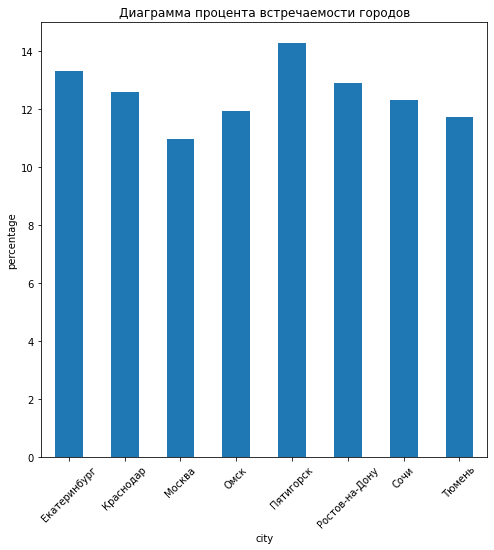

In [ ]:
t.plot(kind='bar', rot=45, figsize = [8,8],ylabel='percentage', title = 'Диаграмма процента встречаемости городов').legend = False

По графику видим что больше всего пользователей самокатов GoFast в Пятигорске (14.27%) и Екатеринбурге (13.3%), меньше всего пользователей из Москвы (10.95%, возможно из-за конкуренции) в остальных городах ~12%

#### Cоотношение пользователей с подпиской и без подписки

Создадим св. таблицу с кол-ом наблюдений для каждой подписки

In [ ]:
t = df1.groupby('subscription_type')['user_id'].count()
t

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64

Переведем в проценты

In [ ]:
t = t/len(df1) * 100
t

subscription_type
free     54.432855
ultra    45.567145
Name: user_id, dtype: float64

Начертим диаграмму

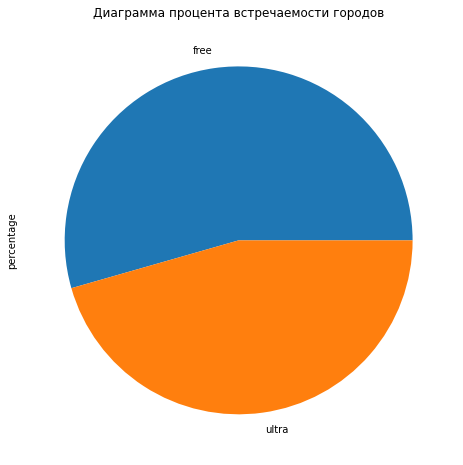

In [ ]:
t.plot(kind='pie', rot=45,figsize = [8, 8], ylabel='percentage', title = 'Диаграмма процента встречаемости городов').legend = False

Можем наблюдать что число пользователей без подписки (54.43%) слегка превышает тех кто с подпиской (45.56%)

#### Возраст пользователей

Построим гистограмму и посмотрим на основные параметры age

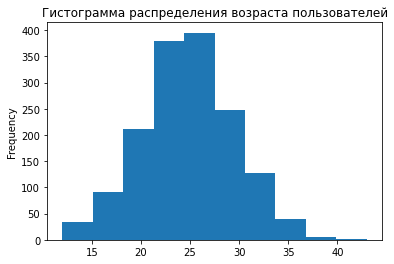

In [ ]:
df1['age'].plot(kind='hist', title = 'Гистограмма распределения возраста пользователей').legend = False

In [ ]:
df1['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Гистограмма напомминает нормальное распределение, разброс возраста наблюдается от 12 до 43 лет, в среднем пользователи имеют возраст 25 лет

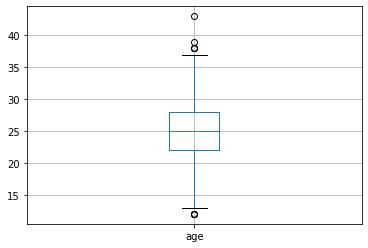

In [ ]:
df1.boxplot(column=['age']).legend = False

Наблюдаем незначительные выход некоторых значений за границы межквартильного размаха, делать с ними что-то является некоректным т.к. данные соответствуют реальности

#### Расстояние которое проехал пользователь

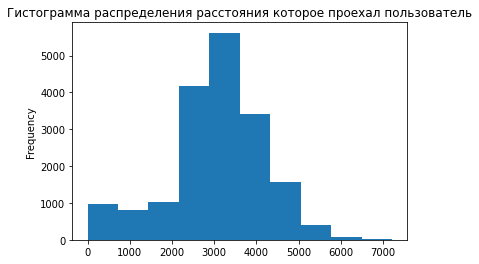

In [ ]:
df2['distance'].plot(kind='hist', title = 'Гистограмма распределения расстояния которое проехал пользователь').legend = False

In [ ]:
df2['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Гистограмма напомминает нормальное распределение чуть скошенное влево, разброс наблюдается от 0.85 до 7211 метров, в среднем пользователи проезжают 3070 метров, медианное значение слегка отличается (3133 метров) от среднего из-за 'скоса влево'

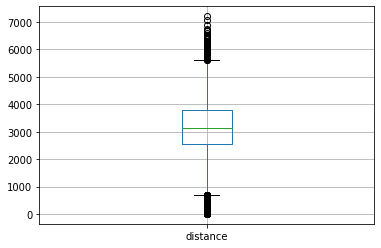

In [ ]:
df2.boxplot(column=['distance']).legend = False

Наблюдаем выход некоторых значений за границы межквартильного размаха, не столь экстремальные чтобы делать с ними что-то, вероятнее всего данные соответствуют реальности

#### Продолжительность сессии

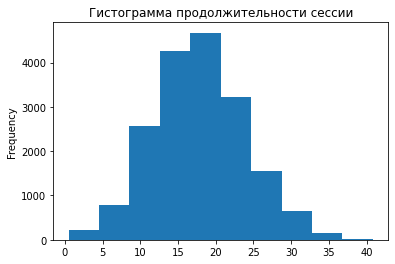

In [ ]:
df2['duration'].plot(kind='hist', title = 'Гистограмма продолжительности сессии').legend = False

In [ ]:
df2['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Гистограмма напомминает нормальное распределение, разброс времени наблюдается от 0.5 до 40.8 минут, в среднем пользователи тратят на поездку 17.67 минут

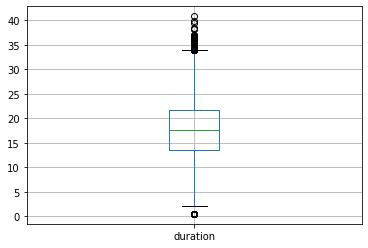

In [ ]:
df2.boxplot(column=['duration']).legend = False

Наблюдаем выход некоторых значений за границы межквартильного размаха, больший вес имеют данные с чуть меньше временем из-за чего больше 'верхних' значенний выходят за границы межквартильного размаха, не столь экстремальные чтобы делать с ними что-то, вероятнее всего данные соответствуют реальности

### Шаг 4. Объединение данных

#### Объединение данных в один df

Методом merge примененным к df2 присоединяем df1 по общему столбцу user_id и сохраняем в df_sub

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [ ]:
df_sub = df2.merge(df1,on='user_id', how='outer')
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
df_sub.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra


In [ ]:
df_sub.isna().mean()

user_id              0.0
distance             0.0
duration             0.0
date                 0.0
month                0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64

Присоединяем к уже получившийся df_sub таблицу df3  по общему столбцу subscription_type и сохраняем в df

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [ ]:
df = df_sub.merge(df3,on='subscription_type', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [ ]:
df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [ ]:
df.isna().mean()

user_id              0.0
distance             0.0
duration             0.0
date                 0.0
month                0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64

В обьединенном df: 6 колонок тип int (user_id, month, age, minute_price, start_ride_price, subscription_fee), 3 колонки типа object (name, city, subscription_type), 2 колонки типа float (distance, duration) и колонка типа datetime (date). Длина df составляет 18067 строк, пропусков нет

#### Создание двух датафреймов c данными о пользователях: без подписки, с подпиской

Сохраняем данные о пользователях с подпиской в df_ultra, отфильтровав по значению subscription_type тех кто 'ultra'

In [ ]:
df_ultra = df[df['subscription_type'] == 'ultra']
df_ultra['subscription_type'].unique()

array(['ultra'], dtype=object)

In [ ]:
df_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Сохраняем данные о пользователях без подписки в df_free, отфильтровав по значению subscription_type тех кто 'free'

In [ ]:
df_free = df[df['subscription_type'] == 'free']
df_free['subscription_type'].unique()

array(['free'], dtype=object)

In [ ]:
df_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Проверка:

In [ ]:
len(df) == len(df_ultra) + len(df_free)

True

#### Исследование  расстояния и времени поездок df_ultra

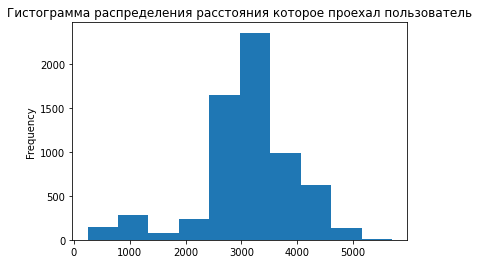

In [ ]:
df_ultra['distance'].plot(kind='hist', title = 'Гистограмма распределения расстояния которое проехал пользователь').legend = False

In [ ]:
df_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Гистограмма напомминает нормальное распределение с 'хвостом' по левому краю, разброс расстояния варьируется от 244 до 5699 метров, в среднем пользователи с подпиской проезжают за поездку 3115 метров

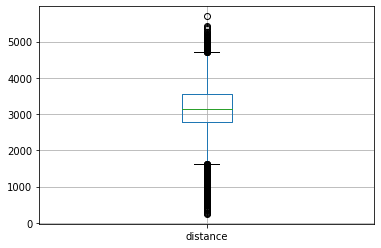

In [ ]:
df_ultra.boxplot(column=['distance']).legend = False

Наблюдаем выход значений за границы межквартильного размаха из-за повышенной плотности значений отнсительно 'крайних значений', больший вес имеют данные с 'большим' расстоянием из-за чего больше 'нижних' значенний выходят за границы межквартильного размаха

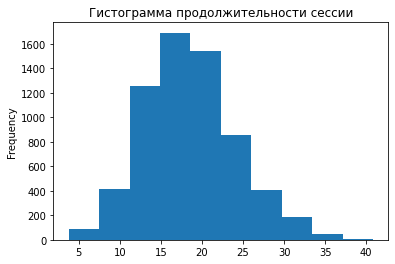

In [ ]:
df_ultra['duration'].plot(kind='hist', title = 'Гистограмма продолжительности сессии').legend = False

In [ ]:
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Гистограмма напомминает нормальное распределение со 'скосом' к левому краю, разброс времени варьируется от 3,76 до 40,82 минут, в среднем пользователи с подпиской тратят на поездку 18,54 минут

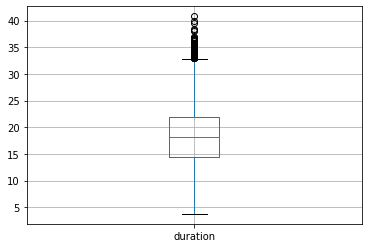

In [ ]:
df_ultra.boxplot(column=['duration']).legend = False

Наблюдаем незначительный выход 'верхних' значений за границы межквартильного размаха, больший вес имеют данные с 'нижним'  временем из-за чего больше 'верхних' значенний выходят за границы межквартильного размаха

#### Исследование  расстояния и времени поездок df_free

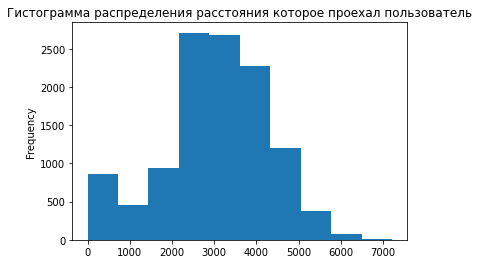

In [ ]:
df_free['distance'].plot(kind='hist', title = 'Гистограмма распределения расстояния которое проехал пользователь').legend = False

In [ ]:
df_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Гистограмма напомминает нормальное распределение со 'скосом' к левому краю, разброс расстояния варьируется от 0,85 до 7211 метров, в среднем пользователи без подписки проезжают за поездку 3045 метров

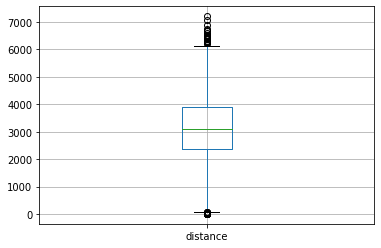

In [ ]:
df_free.boxplot(column=['distance']).legend = False

Наблюдаем незначительный выход 'верхних' значений за границы межквартильного размаха, больший вес имеют данные с 'нижним'  временем из-за чего больше 'верхних' значенний выходят за границы межквартильного размаха

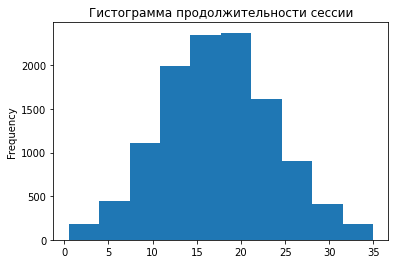

In [ ]:
df_free['duration'].plot(kind='hist', title = 'Гистограмма продолжительности сессии').legend = False

In [ ]:
df_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Гистограмма напомминает нормальное распределение, разброс времени варьируется от 0,5 до 34,94 минут, в среднем пользователи без подписки тратят на поездку 17,39 минут

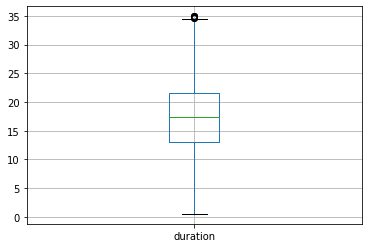

In [ ]:
df_free.boxplot(column=['duration']).legend = False

Наблюдаем практически идеально распределенное значение лишь очень незначительная часть выходит за границы межквартильного размаха 'верхних' значений

### Шаг 5. Подсчёт выручки

#### Создание датафрейма с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц

Создадим таблицу df_basic у которой индексы это имена пользователей и месяц, в колонках посчитаем суммарное время и расстояние для каждого пользователя и за каждый месяц

In [ ]:
df['duration'] = np.ceil(df['duration'])
df_basic = df.groupby(['user_id', 'month'])[['distance', 'duration']].agg(['count', 'sum'])
df_basic.columns = ['_'.join(col).strip() for col in df_basic.columns.values]
df_basic

distance_count  distance_sum  duration_count  duration_sum
user_id month                                                            
1       1                   2   7027.511294               2          42.0
        4                   1    754.159807               1           7.0
        8                   2   6723.470560               2          46.0
        10                  2   5809.911100               2          32.0
        11                  3   7003.499363               3          56.0
...                       ...           ...             ...           ...
1534    6                   2   3409.468534               2          26.0
        8                   2   7622.453034               2          48.0
        9                   1   4928.173852               1          23.0
        11                  4  13350.015305               4          78.0
        12                  1   2371.711192               1          16.0

[11331 rows x 4 columns]

Переименнуем колонку в понятный тип записи и удалим лишнюю колонку с 'count' которая дублирует значения

In [ ]:
df_basic = df_basic.rename(columns={'distance_count': 'count_of_trips'})
df_basic.drop(columns = ['duration_count'],axis = 1, inplace=True)
df_basic

count_of_trips  distance_sum  duration_sum
user_id month                                            
1       1                   2   7027.511294          42.0
        4                   1    754.159807           7.0
        8                   2   6723.470560          46.0
        10                  2   5809.911100          32.0
        11                  3   7003.499363          56.0
...                       ...           ...           ...
1534    6                   2   3409.468534          26.0
        8                   2   7622.453034          48.0
        9                   1   4928.173852          23.0
        11                  4  13350.015305          78.0
        12                  1   2371.711192          16.0

[11331 rows x 3 columns]

#### Создание столбца с помесячной выручкой, которую принёс каждый пользователь

Создаю колонку выручки и колнки сведений о подписке, заполняю их значения соответстующим типом данных этих колонок,чтобы было к чему обращаться

Создаю вложенный цикл который обращается к мультииндексу нужного нам значения: сначала i - id пользователя, потом к j - к месяцу

Проверяю выбранную ячейку на тип подписки и в зависимости от ее типа применяю необходимую формулу, заполняю сведениями об этой подписке

In [ ]:
df_basic['revenue_sum'] = 0
df_basic['subscription_type'] = 'N'
df_basic['minute_price'] = 0
df_basic['start_ride_price'] = 0
df_basic['subscription_fee'] = 0
for i in range(1, 1535):
    for j in range(1, 13):
        if str(df[(df['user_id'] == i) & (df['month'] == j)]['subscription_type'].unique()) == "['ultra']":
            df_basic['revenue_sum'][i][j] = ((df3['minute_price'][1] *
                                                           df_basic['duration_sum'][i][j]) +
                                                           df3['subscription_fee'][1])
            df_basic['subscription_type'][i][j] = 'ultra'
            df_basic['minute_price'][i][j] = df3['minute_price'][1]
            df_basic['start_ride_price'][i][j] = df3['start_ride_price'][1]
            df_basic['subscription_fee'][i][j] = df3['subscription_fee'][1]
        elif str(df[(df['user_id'] == i) & (df['month'] == j)]['subscription_type'].unique()) == "['free']":
            df_basic['revenue_sum'][i][j] = ((df3['minute_price'][0] *
                                                           df_basic['duration_sum'][i][j]) +
                                                           df3['subscription_fee'][0] +
                                                          (df3['start_ride_price'][0] *
                                                           df_basic['count_of_trips'][i][j]))
            df_basic['subscription_type'][i][j] = 'free'
            df_basic['minute_price'][i][j] = df3['minute_price'][0]
            df_basic['start_ride_price'][i][j] = df3['start_ride_price'][0]
            df_basic['subscription_fee'][i][j] = df3['subscription_fee'][0]

In [ ]:
df_basic

count_of_trips  distance_sum  duration_sum  revenue_sum  \
user_id month                                                            
1       1                   2   7027.511294          42.0          451   
        4                   1    754.159807           7.0          241   
        8                   2   6723.470560          46.0          475   
        10                  2   5809.911100          32.0          391   
        11                  3   7003.499363          56.0          535   
...                       ...           ...           ...          ...   
1534    6                   2   3409.468534          26.0          308   
        8                   2   7622.453034          48.0          484   
        9                   1   4928.173852          23.0          234   
        11                  4  13350.015305          78.0          824   
        12                  1   2371.711192          16.0          178   

              subscription_type  minute_price  start_ride_price  \
user_id month                                                     
1       1                 ultra             6                 0   
        4                 ultra             6                 0   
        8                 ultra             6                 0   
        10                ultra             6                 0   
        11                ultra             6                 0   
...                         ...           ...               ...   
1534    6                  free             8                50   
        8                  free             8                50   
        9                  free             8                50   
        11                 free             8                50   
        12                 free             8                50   

               subscription_fee  
user_id month                    
1       1                   199  
        4                   199  
        8                   199  
        10                  199  
        11                  199  
...                         ...  
1534    6                     0  
        8                     0  
        9                     0  
        11                    0  
        12                    0  

[11331 rows x 8 columns]

### Шаг 6. Проверка гипотез

#### Тратят ли пользователи с подпиской больше времени на поездки

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0: Средние значения времени на поездки у пользователей с подпиской равны ср.зн. времени у пользователей без подписки

Н1: Пользователи с подпиской тратят больше времени на поездки

In [ ]:
alpha = 0.05

results = st.ttest_ind(df_ultra['duration'], df_free['duration'], equal_var = False, alternative = 'greater')

print('Среднее значение времени поездки у пользователей с подпиской', round(df_ultra['duration'].mean(), 2))

print('Среднее значение времени поездки у пользователей без подпиской', round(df_free['duration'].mean(), 2))

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее значение времени поездки у пользователей с подпиской 18.54
Среднее значение времени поездки у пользователей без подпиской 17.39
p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Получаем очень низкую вероятность получить случайно значения при верной нулевой гипотезе что ниже чем установленный нами уровень стат значимасти в 5%, это дает нам право утверждать что пользователи с подпиской тратят больше времени на поездки

#### Расстояние одной поездки в 3130 метров — оптимальное?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Н0: Среднее расстояние которое проезжают пользователи с подпиской равно 3130 метров

Н1: Ср. расстояние которое проезжают пользователи с подпиской больше 3130 метров

In [ ]:
distance_value = 3130

results = st.ttest_1samp(df_ultra['distance'], distance_value,alternative='greater')

print('Среднее значение расстояния поездки у пользователей с подпиской', round(df_ultra['distance'].mean(), 2))

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее значение расстояния поездки у пользователей с подпиской 3115.45
p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Получаем значение Pvalue больше чем установленный нами уровень стат значимасти в 5%, это нам говорит о том что результат с высокой вероятностью мог быть случайным. Поэтому мы не можем утверждать что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

#### Выручка от пользователей с подпиской по месяцам выше?

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Н0: Помесячная выручка пользователей с подпиской равна помесячной выручке пользователей без подписки

Н1: Помесячная выручка пользователей с подпиской выше чем помесячная выручка пользователей без подписки

Беру значения выручки из df_basic по месяцам, сортирую их на тех пользователей что с подпиской и на тех что без подписки в 2 листа (l_ultra, l_free). Считаю между этими списками pvalue и сахраняю эти значения в список. Считаю среднее между pvalue за каждый месяц и по итогам сравнения среднего с коэффицентом стат значимости (5%) делаю вывод.

In [ ]:
results = st.ttest_ind(df_basic[df_basic['subscription_type'] == 'ultra']['revenue_sum'],
                       df_basic[df_basic['subscription_type'] == 'free']['revenue_sum'],
                       equal_var = False, alternative = 'greater')
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [ ]:
l_ultra = []
l_free = []

for i in range(1, 1535):
    for j in range(1, 13):
        if str(df[(df['user_id'] == i) & (df['month'] == j)]['subscription_type'].unique()) == "['ultra']":
            l_ultra.append(df_basic['revenue_sum'][i][j])
        elif str(df[(df['user_id'] == i) & (df['month'] == j)]['subscription_type'].unique()) == "['free']":
            l_free.append(df_basic['revenue_sum'][i][j])
results = st.ttest_ind(l_ultra, l_free, equal_var = False, alternative = 'greater')

print('Среднее значение выручки пользователей с подпиской', sum(l_ultra)/len(l_ultra))
print('Среднее значение выручки пользователей без подписки', sum(l_free)/len(l_free))
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Среднее значение выручки пользователей с подпиской 362.7921906022502
Среднее значение выручки пользователей без подписки 328.6413651073845
p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Получаем значение Pvalue меньше чем установленный нами уровень стат значимасти в 5%. Поэтому мы можем утверждать что помесячная выручка пользователей с подпиской выше чем помесячная выручка пользователей без подписки.

#### Ответ на вопрос про гипотезу о равенстве средних для зависимых (парных) выборок

 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Так как у нас ситуация когда данные измеряется дважды для одних и тех же объектов, то это получается парной выборкой

Гипотезы формируем вида:

H0: μ1 = μ2

H1: μ1 > μ2

где μ - кол-во обращений в техподдержку

Применяем метод  scipy.stats.ttest_rel() с аргументом alternative='greater'

### Шаг 7. Распределения

#### Вопрос о количестве промокодов

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку.
То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей.
Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.
Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

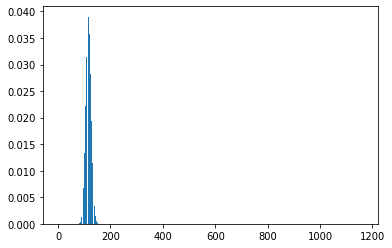

In [ ]:
n = 1161 # количество разосланных промокодов
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)

plt.bar(range(0, n + 1), distr).title = '_'

In [ ]:
s = 0
for i in range(100):
    s += distr[i]
print(s)

0.04976090094990328


При помощи биномиального распределение, которое описывает указанную ситуацию, подбирая такое n что при 100 клиентах это пудет соответствовать 5% вероятности ("левый хвост" биномиального распределения) подобрали минимальное количество промокодов которые нужно разослать.

n = 1161

#### Вопрос о вероятности что уведомление откроют не более 399,5 тыс. пользователей

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов.
Отдел планирует разослать 1 млн уведомлений.
С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

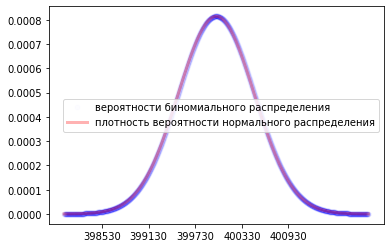

0.15371708296369768


In [ ]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4
# задаём параметры нормального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
# задаём нормальное распределение
distr = st.norm(mu, sigma)
# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(399500)
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5, alpha=0.01, label='вероятности биномиального распределения')
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 600))
ax.set_xticks(x_ticks)
# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

print(result)

При помощи аппроксимации биномиального распределения и метода cdf() была проведена оценка вероятности того, что уведомление откроют не более 399,5 тыс. пользователей, что соответствует ~15.3%.

### Общий вывод

В проделанной работе есть промежуточные выводы,
в общем выводе я бы хотел обобщить их и подвести итог по работе с данными


<h4>Загрузка данных</h4>

**Даннны 3 таблицы с данными о сервисе аренды самокатов GoFast:**

-в первой таблице 2 колонки тип int (user_id, age), 3 колонки типа object (name, city, subscription_type)

-во второй таблице 2 колонки тип float (distance, duration), 1 колонка типа int (user_id) и 1 колонка типа object (date)

-в третьей таблице 3 колонки тип int (minute_price, start_ride_price, subscription_fee) и 1 колонка типа object (subscription_type)

<h4>Предобработка данных</h4>

Во второй таблице был приведен столбец date к типу даты pandas. Был создан новый столбец с номером месяца на основе столбца date

Была проведена проверка на наличе пропусков в данных, пропусков не обнаружилось

В первой таблице обнаружилось 31 явных дубликатов, избавился от них

Явных дубликатов во второй и третей таблице нет

В первой таблице обнаружилось что есть значения в которых все колонки совподают кроме user_id, решил не трогать такие значения так как основная информация по поездкам расположенна во df2 и от туда мы будем обращаться по user_id к информации о пользователе ибо если их удалить в общем df возможно появление пропусков из-за невозможности найти данные по user_id при обьединении

Во второй таблице при проверке количественной переменной duration обнаружелись дубликаты, выяснилось интересное наблюдение что минимальное время сессии может быть только 30 секунд

<h4>Исследовательский анализ данных</h4>

Больше всего пользователей самокатов GoFast в Пятигорске (14.27%) и Екатеринбурге (13.3%), меньше всего пользователей из Москвы (10.95%, возможно из-за конкуренции) в остальных городах ~12%

Пользователей без подписки (54.43%) слегка превышает тех кто с подпиской (45.56%)

Разброс возраста наблюдается от 12 до 43 лет, в среднем пользователи имеют возраст 25 лет

Разброс расстояния которое проезжает пользователь наблюдается от 0.85 до 7211 метров, в среднем пользователи проезжают 3070 метров

Разброс времени на поездку наблюдается от 0.5 до 40.8 минут, в среднем пользователи тратят на поездку 17.67 минут

<h4>Объединение данных</h4>

Методом merge примененным к df2 присоединили df1 по общему столбцу user_id и сохранили в df_sub

Присоединили к уже получившийся df_sub таблицу df3  по общему столбцу subscription_type и сохраняли в df

В обьединенном df: 6 колонок тип int (user_id, month, age, minute_price, start_ride_price, subscription_fee), 3 колонки типа object (name, city, subscription_type), 2 колонки типа float (distance, duration) и колонка типа datetime (date). Длина df составляет 18067 строк, пропусков нет

Сохранили данные о пользователях с подпиской в df_ultra

Сохранили данные о пользователях без подписки в df_free

**Исследование  расстояния и времени поездок df_ultra:**

-разброс расстояния варьируется от 244 до 5699 метров, в среднем пользователи с подпиской проезжают за поездку 3115 метров

-разброс времени варьируется от 3,76 до 40,82 минут, в среднем пользователи с подпиской тратят на поездку 18,54 минут

**Исследование  расстояния и времени поездок df_free:**

-разброс расстояния варьируется от 0,85 до 7211 метров, в среднем пользователи без подписки проезжают за поездку 3045 метров

-разброс времени варьируется от 0,5 до 34,94 минут, в среднем пользователи без подписки тратят на поездку 17,39 минут

<h4>Подсчёт выручки</h4>

Была создана таблица df_basic у которой индексы это имена пользователей, в колонках суммарное время и расстояние для каждого пользователя

**За каждый месяц и для каждого пользователя посчитано и добавлено в df_basic:**

-расстояние, которое пользователь проехал

-суммарное продолжительность сессий

-количеством поездок

-выручка, которую принёс пользователь

(подробнее таблица df_basic п.5.2)

<h4>Проверка гипотез</h4>

**Сформулирована гипотеза:**

-H0: Средние значения времени на поездки у пользователей с подпиской равны ср.зн. времени у пользователей без подписки

-Н1: Пользователи с подпиской тратят больше времени на поездки

Среднее значение времени поездки у пользователей с подпиской 18.54

Среднее значение времени поездки у пользователей без подпиской 17.39

p-значение: 5.6757813771289775e-37

Отвергаем нулевую гипотезу

Получили очень низкую вероятность получить случайно значения при верной нулевой гипотезе что ниже чем установленный нами уровень стат значимасти в 5%, это дает нам право утверждать что пользователи с подпиской тратят больше времени на поездки

Стоит присмотреться к пользователям без подписки, почему они тратят меньше времени на поездки относительно пользователей с подпиской и можно ли на это повлиять.

**Сформулирована гипотеза:**

-Н0: Среднее расстояние которое проезжают пользователи с подпиской равно 3130 метров

-Н1: Ср. расстояние которое проезжают пользователи с подпиской больше 3130 метров

Среднее значение расстояния поездки у пользователей с подпиской 3115.45

p-значение: 0.08046311521502146

Не отвергаем нулевую гипотезу

Получили значение Pvalue больше чем установленный нами уровень стат значимасти в 5%, это нам говорит о том что результат с высокой вероятностью мог быть случайным. Поэтому мы не можем утверждать что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Надо проверить пользователей без подписки, то что они меньше времени тратят на поездку не означает что они меньше расстояние проезжают,  возможно скорость у них больше

**Сформулирована гипотеза:**

Н0: Помесячная выручка пользователей с подпиской равна помесячной выручке пользователей без подписки

Н1: Помесячная выручка пользователей с подпиской выше чем помесячная выручка пользователей без подписки

p-значение: 8.874140893976874e-40

Отвергаем нулевую гипотезу

Полученное значение Pvalue меньше чем установленный нами уровень стат значимасти в 5%. Поэтому мы можем утверждать что помесячная выручка пользователей с подпиской выше чем помесячная выручка пользователей без подписки

**Ответ на вопрос про гипотезу о равенстве средних для зависимых (парных) выборок (п.6.4)**

-H0: μ1 = μ2

-H1: μ1 > μ2

-где μ - кол-во обращений в техподдержку

-применяем метод  scipy.stats.ttest_rel() с аргументом alternative='greater'

<h4>Распределения</h4>

При помощи биномиального распределение, которое описывает указанную ситуацию, подбирая такое n что при 100 клиентах это пудет соответствовать 5% вероятности ("левый хвост" биномиального распределения) подобрали минимальное количество промокодов которые нужно разослать в задаче п.7.1

n = 1161

При помощи аппроксимации биномиального распределения и метода cdf() была проведена оценка вероятности того, что уведомление откроют не более 399,5 тыс. пользователей, что соответствует ~15.3% в задаче п.7.2